This program attempts to classify images of lego pieces as circles, rectangles, or squares. The data is stored in folders titled 'training' and 'testing'. The following code will show the steps neccessary to complete one loop of the image manipulation(note: you must have 'cir_1.png' saved in the working directory).


First, the directories are defined. Second, functions are defined to create the input data from the images and labels from the file name. Third, a model is trained to classify the images based on the testing data. Fourth, predictions are made based on the model. Fifth, a confusion matrix is created to display the models accuracy. Sixth, a visualization of the data with predicitons and confidence is displayed.


If you do not want to see how one image is processed, then proceed to the ***Define Directory*** line.

In [1]:
#import
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.transform import resize, rescale, downscale_local_mean
import os
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import pandas as pd

The code below is the non looped verision, doing the steps:
1. Load image
2. Crop to square
3. Resize to 64x64 (chosen for now)
4. Greyscale
5. Vectorize

PNG
RGBA
(1001, 1005)
<class 'PIL.PngImagePlugin.PngImageFile'>


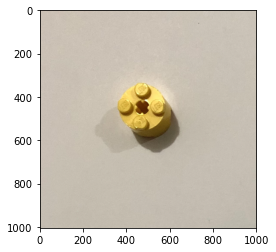

In [2]:
#1. load one image

img = Image.open('cir_1.png')

#Get basic details about the image
print(img.format)
print(img.mode)
print(img.size)
print(type(img))

#show the image
show =plt.imshow(img)

(700, 700)


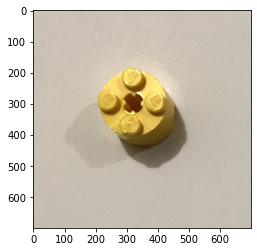

In [3]:
#2. Crop to square

#define boundaries
left = 150
top = 150
right = 850
bottom = 850


img_crop = img.crop((left, top, right, bottom))

#show the image
show_crop =plt.imshow(img_crop)

#show cropped size
print(img_crop.size)

Original size is: (700, 700)
New size is: (64, 64)


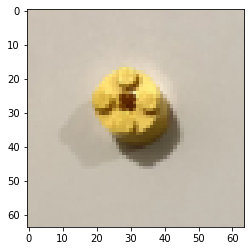

In [4]:
#3. Resize to LxL 
#using L = 64 here

print('Original size is:',img_crop.size)

resized_image = img_crop.resize((64,64))
print('New size is:',resized_image.size)

show = plt.imshow(resized_image)

<PIL.Image.Image image mode=LA size=64x64 at 0x2143470F520>


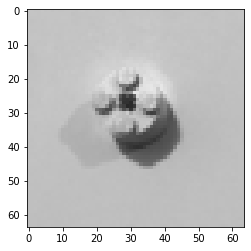

In [5]:
#4. Greyscale the image

img_gray = resized_image.convert('LA')

print(img_gray)
show = plt.imshow(img_gray)

In [6]:
#5. Vectorize the image

#to start, turn the image into an array

array1 = np.array(img_gray)
print('Shape is:',array1.shape)
#print(array1)

#next divide the array by 255 as the array is values 0-255 and we want 0-1

v1 = array1/255
#print(v1)

Shape is: (64, 64, 2)


Now to loop all the functions into one loop

***Define Directory***

In [8]:
#Define directory
Train = os.listdir("C:\\Users\\nolan\\418 ML\\Project - Lego classification\\training")
#print(Train)

In [10]:
#Check the size and type of the directory
#print(len(Train))
#print(type(Train))

Now to attempt to do steps 1-5 for each file name and store into a matrix of feature vectors


X Train

In [14]:
#Start by creating a blank list
x_list = []

#Next create a function to do steps 1-5 and append the vectors into the blank list
def X_modifier(Train):
    for X in Train:
        
        a = Image.open(X)
        
        b = a.crop((left, top, right, bottom))
        
        c = b.resize((64,64))
        
        d = c.convert('LA')
        
        array = np.array(d)
        
        vector = array/255
        
        x_list.append(vector)
        
    return x_list

C = X_modifier(Train) #this runs the function and stores the modified images in x_list 

In [32]:
#Check length
print(len(x_list))
X_Train_len = len(x_list)

54


In [33]:
#we want the data in a 2D array so that we can use a logistic regression model
x_list_array = np.array(x_list)

print(x_list_array.shape)

X_Train = np.array(x_list_array).reshape(X_Train_len,-1)

print(X_Train.shape)
#The data is now a 2D array of 54 images with 8192 features

(54, 64, 64, 2)
(54, 8192)


Now to attempt to label the data (yp) by appending a label to the pictures where:

circles = 'cir'

rectangles = 'rec'

squares = 'squ

In [22]:
#Start by creating a blank list
y_list = []

#and defining yp labels
yp0 = ['cir']
yp1 = ['rec']
yp2 = ['squ']

#Next create a function to determine if the label is in the filename and append the labels into the blank list
def Y_label_finder(Train):
    for filename in Train:

        if 'cir' in filename:
            l = yp0
        if 'rec' in filename:
            l = yp1
        if 'squ' in filename:
            l = yp2
        
    
        y_list.append(l)

        
    return y_list

D = Y_label_finder(Train) #this runs the function and stores the labels in y_list 

In [34]:
#Check length and data style
print(len(y_list))
print(y_list)
Y_Train_len = len(y_list)

54
[['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['cir'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['rec'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ'], ['squ']]


In [38]:
#we want the data in a 2D array so that we can use a logistic regression model
y_list_array = np.array(y_list)

print(y_list_array.shape) 

Y_Train = np.array(y_list_array).reshape(Y_Train_len,1) #this step may be redundant

print(Y_Train.shape)
#The data is now a 2D array of 54 labels

(54, 1)
(54, 1)


Train the model

In [39]:
model = linear_model.LogisticRegression()
model.fit(X_Train, Y_Train)

C:\Users\nolan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nolan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
#Define directory
Test = os.listdir("C:\\Users\\nolan\\418 ML\\Project - Lego classification\\testing")
#print(Test)

X TEST

In [44]:
#
x_list_test = []

def X_Modifier(Test):
    for X in Test:
        
        a = Image.open(X)
    
        b = a.crop((left, top, right, bottom))
    
        c = b.resize((64,64))
    
        d = c.convert('LA')
    
        array = np.array(d)
        vector = array/255
        
        x_list_test.append(vector)
        
    return x_list_test

E = X_Modifier(Test)

In [50]:
#Check the length
print(len(x_list_test))
X_Test_len = len(x_list_test)

54


In [51]:
#we want the data in a 2D array
X_Test_array = np.array(x_list_test)

print(X_Test_array.shape)

X_Test = np.array(X_Test_array).reshape(X_Test_len,-1)

print(X_Test.shape)

(54, 64, 64, 2)
(54, 8192)


Y TEST

In [47]:
#this is the actual Y test label

y_test = []

yp0 = 'cir'
yp1 = 'rec'
yp2 = 'squ'

def Y_Actual_finder(Test):

    for filename in Test:

        if 'cir' in filename:
            l = yp0
        if 'rec' in filename:
            l = yp1
        if 'squ' in filename:
            l = yp2
        
    
        y_test.append(l)

        
    return y_test

Y_Actual = Y_Actual_finder(Test)

In [158]:
#Check length
print(len(Y_Actual))
#print(Y_Actual)
Y_Test_len = len(Y_Actual)

54


In [72]:
#we want the data in a 1D array
Y_Test = np.array(Y_Actual)

print(Y_Test.shape)

#The data is now a 1D array of 54 labels
#print(Y_Test)

(54,)


Make a prediciton

In [73]:
#Use the model to make predictions of the Y label
Y_pred = model.predict(X_Test)
print(Y_pred.shape)

(54,)


Confusion Matrix

In [76]:
confusion_matrix = pd.crosstab(Y_Test, Y_pred, rownames = ['Actual'], colnames= ['Predicted'])
print(confusion_matrix)

Predicted  cir  rec  squ
Actual                  
cir         18    0    0
rec          0   18    0
squ          0    0   18


Lets visualize one sample

In [2]:
#N is the sample number from 0 to 53. Choose this randomly to visually check the prediciton
N = 22

#calculate probabilities
probability_cir = model.predict_proba(X_Test)[N,0]
probability_rec = model.predict_proba(X_Test)[N,1]
probability_squ = model.predict_proba(X_Test)[N,2]
max_probability = max(probability_cir,probability_rec,probability_squ)


#print resulta
print('It is most likely that this image is of a', Y_pred[N],'lego piece with a', round(max_probability*100,1),'% confidence\n')
print('The model is',round(probability_cir*100,1),'% confident that this sample is a circle')
print('The model is',round(probability_rec*100,1),'% confident that this sample is a rectangle')
print('The model is',round(probability_squ*100,1),'% confident that this sample is a square')

Image.open(Test[N])


NameError: name 'model' is not defined